In [3]:
import yfinance as yf
amzn = yf.Ticker("AMZN")
hist = amzn.history(period="1d", interval = "1m",)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2020-09-30 09:30:00-04:00,3141.14,3152.75,3141.14,3151.74,86323,0,0
2020-09-30 09:31:00-04:00,3153.00,3156.00,3150.65,3156.00,17958,0,0
2020-09-30 09:32:00-04:00,3156.25,3161.65,3155.03,3155.03,30350,0,0
2020-09-30 09:33:00-04:00,3156.00,3156.04,3153.24,3155.51,13382,0,0
2020-09-30 09:34:00-04:00,3154.00,3158.00,3153.00,3153.00,16082,0,0


In [13]:
import numpy as np
hist['trend'] = hist['Close'].rolling(2).apply(lambda x: np.polyfit(np.arange(2), x, 1)[0])

In [14]:
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,trend
Datetime,,,,,,,,
2020-09-30 12:18:00-04:00,3205.15,3205.15,3203.70,3203.70,7296,0,0,-1.80
2020-09-30 12:19:00-04:00,3203.70,3203.74,3202.30,3202.68,6803,0,0,-1.02
2020-09-30 12:20:00-04:00,3202.56,3204.55,3202.56,3203.93,6178,0,0,1.25
2020-09-30 12:21:00-04:00,3204.54,3205.00,3202.44,3205.00,7052,0,0,1.07
2020-09-30 12:22:00-04:00,3204.15,3205.00,3204.05,3204.54,3981,0,0,-0.46
2020-09-30 12:23:00-04:00,3204.45,3205.00,3203.92,3204.51,4021,0,0,-0.03
2020-09-30 12:24:00-04:00,3205.59,3206.69,3205.23,3205.36,5111,0,0,0.85
2020-09-30 12:25:00-04:00,3205.58,3205.58,3202.44,3202.44,6407,0,0,-2.92
2020-09-30 12:26:00-04:00,3202.25,3202.25,3200.04,3201.68,13990,0,0,-0.76


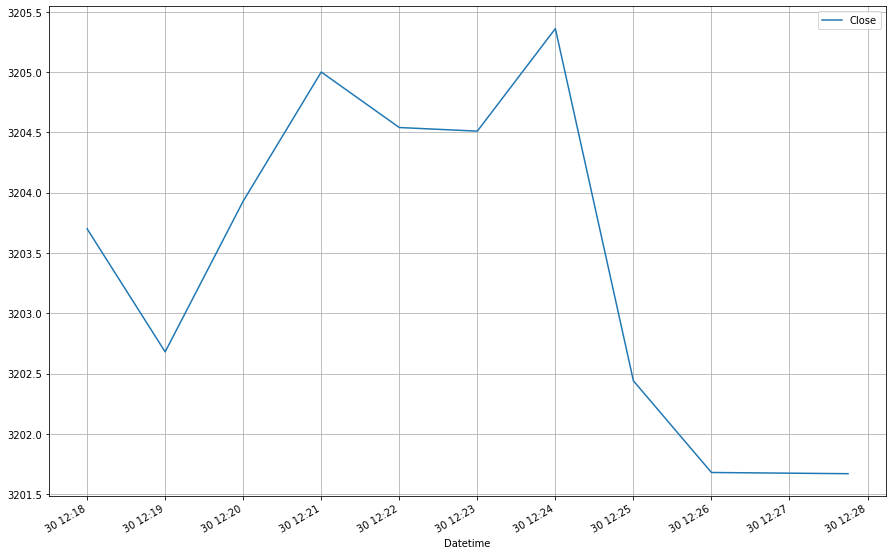

In [16]:
hist.tail(10).plot(y=['Close'], figsize=(15,10), grid=True)

In [62]:
hist = hist.dropna()
training_data = hist[0:len(hist)-10]
inputs = list(zip(training_data['Close'], training_data['Volume']))
out = training_data['trend']

In [93]:
training_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,trend
Datetime,,,,,,,,
2020-09-30 09:31:00-04:00,3153.00,3156.00,3150.65,3156.00,17958,0,0,4.26
2020-09-30 09:32:00-04:00,3156.25,3161.65,3155.03,3155.03,30350,0,0,-0.97
2020-09-30 09:33:00-04:00,3156.00,3156.04,3153.24,3155.51,13382,0,0,0.48
2020-09-30 09:34:00-04:00,3154.00,3158.00,3153.00,3153.00,16082,0,0,-2.51
2020-09-30 09:35:00-04:00,3156.27,3157.00,3149.80,3150.00,16273,0,0,-3.00
...,...,...,...,...,...,...,...,...
2020-09-30 12:13:00-04:00,3208.00,3208.00,3204.34,3205.11,9048,0,0,-2.64
2020-09-30 12:14:00-04:00,3204.78,3204.78,3202.73,3203.95,11063,0,0,-1.16
2020-09-30 12:15:00-04:00,3204.48,3204.86,3204.14,3204.86,4221,0,0,0.91


In [94]:
test_data=hist.tail(10)
test_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,trend
Datetime,,,,,,,,
2020-09-30 12:18:00-04:00,3205.15,3205.15,3203.70,3203.70,7296,0,0,-1.80
2020-09-30 12:19:00-04:00,3203.70,3203.74,3202.30,3202.68,6803,0,0,-1.02
2020-09-30 12:20:00-04:00,3202.56,3204.55,3202.56,3203.93,6178,0,0,1.25
2020-09-30 12:21:00-04:00,3204.54,3205.00,3202.44,3205.00,7052,0,0,1.07
2020-09-30 12:22:00-04:00,3204.15,3205.00,3204.05,3204.54,3981,0,0,-0.46
2020-09-30 12:23:00-04:00,3204.45,3205.00,3203.92,3204.51,4021,0,0,-0.03
2020-09-30 12:24:00-04:00,3205.59,3206.69,3205.23,3205.36,5111,0,0,0.85
2020-09-30 12:25:00-04:00,3205.58,3205.58,3202.44,3202.44,6407,0,0,-2.92
2020-09-30 12:26:00-04:00,3202.25,3202.25,3200.04,3201.68,13990,0,0,-0.76


In [95]:
from sklearn import tree
my_tree = tree.DecisionTreeRegressor(random_state=0)
my_tree = my_tree.fit(inputs, out)

In [76]:
my_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

[Text(167.4, 199.32, 'X[3] <= 0.8\nmse = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(141.64615384615385, 163.07999999999998, 'mse = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nmse = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nmse = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nmse = 0.02\nsamples = 48\nvalue = 1.021'),
 Text(25.753846153846155, 54.359999999999985, 'mse = 0.0\nsamples = 47\nvalue = 1.0'),
 Text(77.26153846153846, 54.359999999999985, 'mse = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nmse = 0.222\nsamples = 6\nvalue = 1.667'),
 Text(128.76923076923077, 54.359999999999985, 'mse = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nmse = 0.222\nsamples = 3\nvalue = 1.333'),
 Text(154.52307692307693, 18.119999999999976, 'mse = 0.0\nsamples = 2\nvalue = 1.0'),


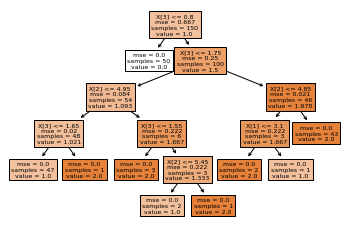

In [86]:
tree.plot_tree(my_tree, filled=True)

In [96]:
x_test = list(zip(test_data['Close'], test_data['Volume']))
x_test

[(3203.7, 7296),
 (3202.68, 6803),
 (3203.93, 6178),
 (3205.0, 7052),
 (3204.54, 3981),
 (3204.51, 4021),
 (3205.36, 5111),
 (3202.44, 6407),
 (3201.68, 13990),
 (3201.67, 0)]

In [101]:
y_pred = my_tree.predict(x_test)
y_pred

array([-0.34, -0.34, -0.34,  0.14, -0.39,  2.41,  1.42, -0.34,  1.58,
        1.58])

In [102]:
y_true = list(zip(test_data['trend']))
y_true

[(-1.8000000000000127,),
 (-1.0200000000010188,),
 (1.249999999999579,),
 (1.0699999999998606,),
 (-0.4600000000005178,),
 (-0.030000000000018845,),
 (0.8499999999992732,),
 (-2.9200000000003663,),
 (-0.7600000000004216,),
 (-0.009999999999912504,)]

In [103]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

-0.7307508157124325